In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(dplyr)
library(ggplot2)
library(magrittr)
library(gridExtra)
library(RColorBrewer)


Attaching package: ‘dplyr’

The following object is masked from ‘package:stats’:

    filter

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: grid


In [3]:
%%R
l2fc.df = read.csv("../data/l2fc_table.csv")

In [4]:
%%R
shift.df = read.csv("../data/density_shifts.csv")

In [5]:
%%R
mdf = data.table::fread("../data/mdf.csv") %>% 
    data.frame %>%
    filter(!grepl("SS", Treatment))

Read 2195072 rows and 18 (of 18) columns from 0.435 GB file in 00:00:04


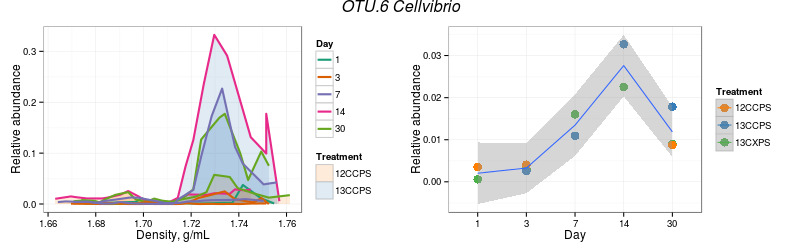

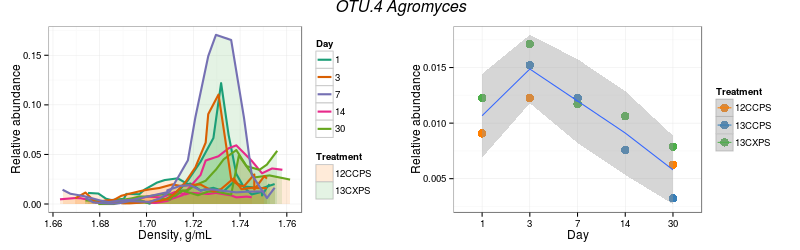

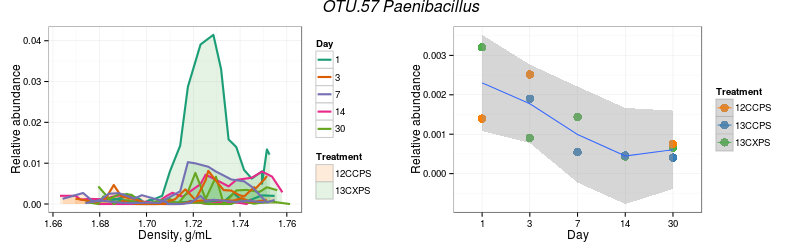

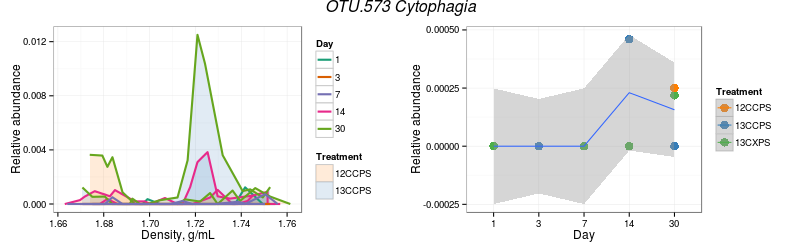

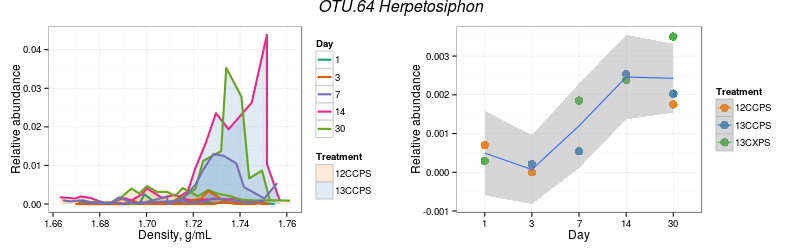

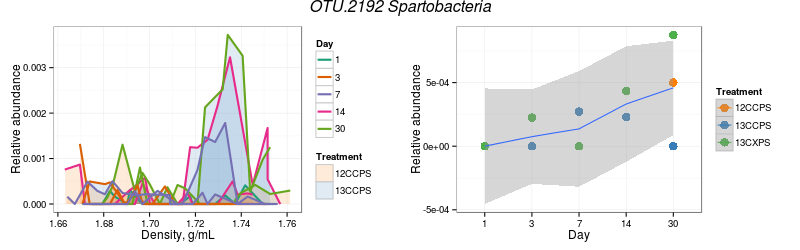

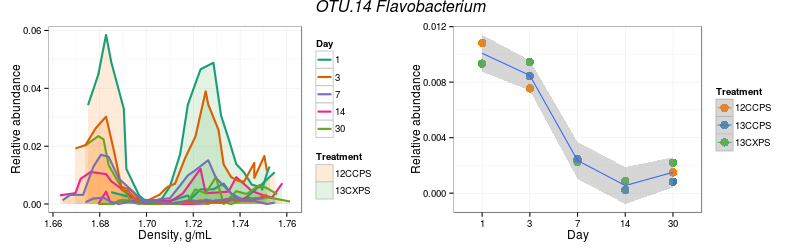

In [87]:
%%R -h 250 -w 800
demo_plot = function(otu, taxon, treatment) {
    
    getPalette = colorRampPalette(brewer.pal(5, "Dark2"))
    
    p1 = mdf %>%
        group_by(Sample) %>%
        mutate(Abundance = Abundance / sum(Abundance)) %>%
        filter(OTU  == otu, !grepl("bulk", Sample), Treatment %in% c("12CCPS", treatment)) %>%
        mutate(grp = paste(Day, Treatment, sep = "_")) %>%
        ggplot(aes(group = grp, x = Density, y = Abundance, fill = Treatment)) +
        geom_area(alpha = 0.15, position = "dodge") + 
        geom_line(size = 1.0, aes(color = factor(Day))) + 
        theme_bw() +
        labs(color = "Day", x = "Density, g/mL", y = "Relative abundance") +
        scale_color_manual(values=getPalette(5))
    
    if (treatment == "13CXPS") {
        p1 = p1 + scale_fill_manual(values = c("#ff7f00", "#4daf4a"))
    } else {
        p1 = p1 + scale_fill_manual(values = c("#ff7f00", "#377eb8"))
    }
        
    p2 = mdf %>%
        group_by(Sample) %>%
        mutate(Abundance = Abundance / sum(Abundance)) %>%
        filter(OTU  == otu, grepl("bulk", Sample)) %>%
        ggplot(aes(x = factor(Day), y = Abundance, color = Treatment)) +
        geom_point(size = 4) + stat_smooth(method = "loess", aes(group = 1)) + 
        theme_bw() +
        labs(x = "Day", y = "Relative abundance") + 
        scale_color_manual(values = c("#ff7f00", "#377eb8", "#4daf4a"))
    
    arrangeGrob(p1, p2, nrow = 1,
                 main=textGrob(paste(otu, taxon, sep = " "), gp = gpar(fontsize=16, font = 3)))
    
    }

get_tax = function(otu, rank) {
    mdf %>%
        filter(OTU == otu) %>%
        extract2(rank) %>%
        as.character %>%
        unique
    }

print(demo_plot("OTU.57", get_tax("OTU.57", "Rank6"), "13CXPS"))
print(demo_plot("OTU.14", get_tax("OTU.14", "Rank6"), "13CXPS"))
print(demo_plot("OTU.4", get_tax("OTU.4", "Rank5"), "13CXPS"))
print(demo_plot("OTU.6", get_tax("OTU.6", "Rank6"), "13CCPS"))
print(demo_plot("OTU.64", get_tax("OTU.64", "Rank5"), "13CCPS"))
print(demo_plot("OTU.2192", get_tax("OTU.2192", "Rank3"), "13CCPS"))
print(demo_plot("OTU.573", get_tax("OTU.573", "Rank3"), "13CCPS"))

In [88]:
%%R
pdf("figs/examples.pdf", w = 13, h = 25)
pushViewport(viewport(w = unit(12, "inches"), 
                      h = unit(24, "inches"),
                      layout = grid.layout(7, 1)))
vplayout <- function(x, y) viewport(layout.pos.row = x, layout.pos.col = y)
print(demo_plot("OTU.57", get_tax("OTU.57", "Rank6"), "13CXPS"), vp = vplayout(1, 1))
print(demo_plot("OTU.14", get_tax("OTU.14", "Rank6"), "13CXPS"), vp = vplayout(2, 1))
print(demo_plot("OTU.4", get_tax("OTU.4", "Rank5"), "13CXPS"), vp = vplayout(3, 1))
print(demo_plot("OTU.6", get_tax("OTU.6", "Rank6"), "13CCPS"), vp = vplayout(4, 1))
print(demo_plot("OTU.64", get_tax("OTU.64", "Rank5"), "13CCPS"), vp = vplayout(5, 1))
print(demo_plot("OTU.2192", get_tax("OTU.2192", "Rank3"), "13CCPS"), vp = vplayout(6, 1))
print(demo_plot("OTU.573", get_tax("OTU.573", "Rank3"), "13CCPS"), vp = vplayout(7, 1))
dev.off()

png 
  2 


In [89]:
FileLink("figs/examples.pdf")

/home/chuck/working/CSIP_succession_data_analysis/figures_and_stats/figs/examples.pdf